In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv("house.csv")
data

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4040,14,600.285032,499.92,84.714882,1,2,115050.425194
4041,14,242.912020,1408.20,94.257176,2,34,99862.768731
4042,14,381.986238,1600.48,175.757426,2,64,103316.062406
4043,17,750.971604,402.62,40.985933,1,80,118134.771190


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [50]:
data.isnull().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error
X = data[['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance', 'floor', 'age']]
y = data['price']


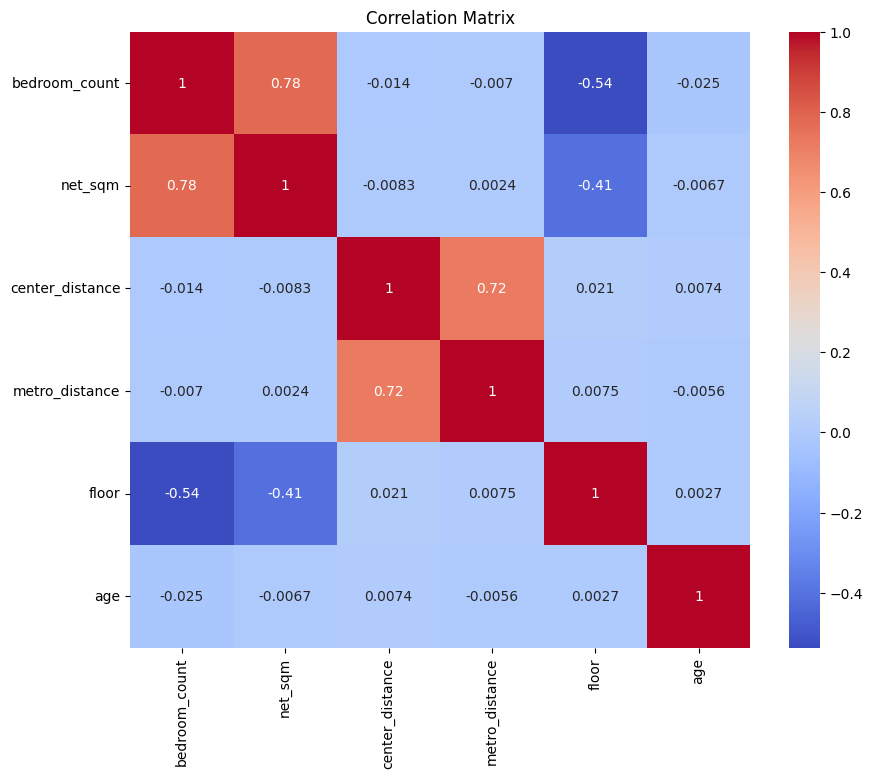

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
r2_scores = []
mae_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 
               'Support Vector Regressor']

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),
          SVR()]

for model_name, model in zip(model_names, models):
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)  # Realizar predicciones en el conjunto de prueba
    r2 = r2_score(y_test, y_pred)  # Calcular el R^2
    mae = mean_absolute_error(y_test, y_pred)  # Calcular el MAE
    r2_scores.append(r2)  # Almacenar el R^2 en la lista
    mae_scores.append(mae)  # Almacenar el MAE en la lista
    print(f'{model_name}: R^2 = {r2:.4f}, MAE = {mae:.2f}')

Linear Regression: R^2 = 0.8989, MAE = 1058.23
Decision Tree Regressor: R^2 = 0.7318, MAE = 1608.30
Random Forest Regressor: R^2 = 0.8667, MAE = 1170.85
Support Vector Regressor: R^2 = 0.0662, MAE = 2762.94
